In [1]:
import pyreadr
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import anndata

from dredFISH.Utils.__init__plots import *

# load Johann et al

In [2]:
# metadata
f = './data/Johann_2016/sample_metadata.csv'
meta = pd.read_csv(f, skiprows=2).set_index("Sample Name")

f = './data/Johann_2016/sample_name_map.csv'
nmap = pd.read_csv(f, header=None)
nmap.columns = ['gsm', 'sample']
meta = meta.join(nmap.set_index('sample'))
meta = meta[~meta['gsm'].isnull()]
meta

,Molecular Subgroup (Consensus),Subgrouping based on 450K methylation data,Subrouping based on Affymetrix gene expression data,Subgrouping based on WGBS methylation data,Subgrouping based on H3K27Ac enhancer correlation,WGS cohort,RNASequencing cohort,WGBS cohort,H3K27Ac ChIP Sequencing cohort,BRD4 ChIP Sequencing cohort,OTX2 ChIP Sequencing cohort,MITF ChIP Sequencing cohort,"Gender (F= FeMale, M=Male)",Age at diagnosis,Localization of primary tumor,Type of SMARCB1 mutation in MLPA/Sanger Sequencing,Type of SMARCB1 mutation in MLPA/Sanger Sequencing,Previosuly published (PMID number),gsm
Sample Name,,,,,,,,,,,,,,,,,,,
dkfz_ATRT_1,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,2.00,infratentorial,NaN,NaN,NaN,GSM1755170
dkfz_ATRT_2,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,2.00,infratentorial,NaN,NaN,NaN,GSM1755171
dkfz_ATRT_3,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,infratentorial,delExon5,delExon5,NaN,GSM1755172
dkfz_ATRT_4,MYC,MYC,NaN,MYC,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,M,4.00,infratentorial,delExon1_Exon9,delTBX1_NIPSNAP1,NaN,GSM1755173
dkfz_ATRT_5,SHH,SHH,NaN,SHH,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,M,4.00,supratentorial,c.197C>A p.Ser66*,delTBX1_NIPSNAP1,NaN,GSM1755174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dkfz_ATRT_146,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,supratentorial,NaN,NaN,NaN,GSM2051701
dkfz_ATRT_147,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,supratentorial,NaN,NaN,NaN,GSM2051702
dkfz_ATRT_148,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,0.90,infratentorial,SMARCA4,NaN,NaN,GSM2051673


In [3]:
# mc data
f = "./data/Johann_2016/Johann_2016_betas.h5ad"
adata = anndata.read(f)
adata

AnnData object with n_obs × n_vars = 485512 × 150

In [4]:
name_lookup = meta.reset_index().set_index('gsm')['Sample Name']
adata.var.index = [name_lookup.loc[samp.split('_')[0]] for samp in adata.var.index]
adata.var = meta.loc[adata.var.index]
adata.var

,Molecular Subgroup (Consensus),Subgrouping based on 450K methylation data,Subrouping based on Affymetrix gene expression data,Subgrouping based on WGBS methylation data,Subgrouping based on H3K27Ac enhancer correlation,WGS cohort,RNASequencing cohort,WGBS cohort,H3K27Ac ChIP Sequencing cohort,BRD4 ChIP Sequencing cohort,OTX2 ChIP Sequencing cohort,MITF ChIP Sequencing cohort,"Gender (F= FeMale, M=Male)",Age at diagnosis,Localization of primary tumor,Type of SMARCB1 mutation in MLPA/Sanger Sequencing,Type of SMARCB1 mutation in MLPA/Sanger Sequencing,Previosuly published (PMID number),gsm
dkfz_ATRT_1,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,2.0,infratentorial,NaN,NaN,NaN,GSM1755170
dkfz_ATRT_2,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,2.0,infratentorial,NaN,NaN,NaN,GSM1755171
dkfz_ATRT_3,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,infratentorial,delExon5,delExon5,NaN,GSM1755172
dkfz_ATRT_4,MYC,MYC,NaN,MYC,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,M,4.0,infratentorial,delExon1_Exon9,delTBX1_NIPSNAP1,NaN,GSM1755173
dkfz_ATRT_5,SHH,SHH,NaN,SHH,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,M,4.0,supratentorial,c.197C>A p.Ser66*,delTBX1_NIPSNAP1,NaN,GSM1755174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dkfz_ATRT_143,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,infratentorial,NaN,NaN,NaN,GSM2051698
dkfz_ATRT_144,MYC,MYC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,GSM2051699
dkfz_ATRT_145,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,GSM2051700
dkfz_ATRT_146,SHH,SHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,supratentorial,NaN,NaN,NaN,GSM2051701


In [5]:
colors = sns.color_palette('Set1', 3)
colors

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726)]

In [6]:
palette = {
    'TYR': colors[0],
    'SHH': colors[1],
    'MYC': colors[2],
}

In [7]:
clsts = adata.var['Subgrouping based on 450K methylation data'].values
clsts

array(['SHH', 'SHH', 'SHH', 'MYC', 'SHH', 'TYR', 'SHH', 'TYR', 'SHH',
       'TYR', 'SHH', 'SHH', 'MYC', 'TYR', 'SHH', 'TYR', 'SHH', 'SHH',
       'SHH', 'SHH', 'SHH', 'TYR', 'TYR', 'TYR', 'TYR', 'MYC', 'MYC',
       'TYR', 'SHH', 'TYR', 'SHH', 'SHH', 'TYR', 'TYR', 'SHH', 'SHH',
       'MYC', 'SHH', 'SHH', 'TYR', 'MYC', 'SHH', 'MYC', 'SHH', 'SHH',
       'MYC', 'TYR', 'TYR', 'MYC', 'MYC', 'SHH', 'TYR', 'MYC', 'SHH',
       'SHH', 'SHH', 'TYR', 'TYR', 'MYC', 'SHH', 'TYR', 'TYR', 'MYC',
       'MYC', 'MYC', 'TYR', 'TYR', 'SHH', 'MYC', 'TYR', 'MYC', 'SHH',
       'TYR', 'SHH', 'SHH', 'TYR', 'MYC', 'TYR', 'SHH', 'TYR', 'SHH',
       'MYC', 'TYR', 'TYR', 'TYR', 'SHH', 'TYR', 'MYC', 'MYC', 'MYC',
       'MYC', 'TYR', 'TYR', 'TYR', 'TYR', 'MYC', 'SHH', 'TYR', 'TYR',
       'TYR', 'TYR', 'SHH', 'SHH', 'MYC', 'SHH', 'SHH', 'SHH', 'SHH',
       'SHH', 'TYR', 'SHH', 'TYR', 'SHH', 'SHH', 'MYC', 'SHH', 'SHH',
       'SHH', 'MYC', 'SHH', 'SHH', 'SHH', 'SHH', 'SHH', 'MYC', 'MYC',
       'TYR', 'SHH',

In [8]:
samp_order = adata.var.sort_values('Subgrouping based on 450K methylation data').index.values
clsts_order = adata.var.sort_values('Subgrouping based on 450K methylation data')['Subgrouping based on 450K methylation data'].values

In [9]:
hps = adata.obs.index.values
hps

array(['cg00050873', 'cg00212031', 'cg00213748', ..., 'ch.22.1008279F',
       'ch.22.47579720R', 'ch.22.48274842R'], dtype=object)

# load our data

In [10]:
f = 'SamplesheetAgeP39final.csv'
meta_m = pd.read_csv(f)
meta_m

,OriginalOrderInBatch,ExternalSampleID,Basename,Age,ConfidenceInAgeEstimate,CanBeUsedForAgingStudies,SpeciesLatinName,SpeciesCommonName,Tissue,Female,...,Steve.InterventionClock.AgeTraf.Cortex.clock.epiAge,Steve.InterventionClock.AgeTraf.Fibroblast.clock.epiAge,Steve.InterventionClock.AgeTraf.Heart.clock.epiAge,Steve.InterventionClock.AgeTraf.Kidney.clock.epiAge,Steve.InterventionClock.AgeTraf.Liver.clock.epiAge,Steve.InterventionClock.AgeTraf.Muscle.clock.epiAge,Steve.InterventionClock.AgeTraf.panTissue.clock.epiAge,Steve.InterventionClock.AgeTraf.Skin.clock.epiAge,Steve.InterventionClock.AgeTraf.Striatum.clock.epiAge,Steve.InterventionClock.AgeTraf.Tail.clock.epiAge
0,1,20147-9 #1,206535570066_R05C02,0.333333,100,yes,Mus musculus,Mouse,Olfactory Bulb,0,...,4.033001,4.926304,0.842963,1.900062,0.269345,2.317238,0.149250,0.662770,4.115116,0.536970
1,2,20207-9 #1,206535570066_R06C02,0.416667,100,yes,Mus musculus,Mouse,Olfactory Bulb,1,...,3.847563,1.656940,0.257613,2.984474,0.363235,1.440735,1.012970,0.485708,4.394053,1.194265
2,3,17016-9 #1,206535570010_R01C01,0.391667,100,yes,Mus musculus,Mouse,Trigeminal nerve,1,...,3.447378,2.460107,-0.041745,0.386455,0.360516,2.363680,0.459224,0.400640,5.752594,1.929016
3,4,17100-9B #1,206535570010_R02C01,0.275000,100,yes,Mus musculus,Mouse,Meninges,0,...,2.556212,1.965027,-0.058308,2.483933,0.127727,1.599632,0.273974,0.232241,5.726338,2.257875
4,5,18161-10B #1,206535570010_R03C01,0.308333,100,yes,Mus musculus,Mouse,Trigeminal nerve,1,...,4.328767,6.060459,-0.016699,3.926171,0.505825,3.300223,0.165580,0.695521,1.290540,0.561456
5,6,20074-9B #1,206535570010_R04C01,0.300000,100,yes,Mus musculus,Mouse,Retro-orbital,1,...,5.105332,2.609845,0.132868,0.668717,0.432172,1.498241,0.568705,0.620582,2.912459,0.426205
6,7,20095-9 #1,206535570010_R05C01,0.416667,100,yes,Mus musculus,Mouse,Optic nerve,0,...,2.409617,0.126154,-0.020210,0.163322,0.205064,0.421941,0.543390,0.260301,1.648521,0.348279
7,8,20137-9 #1,206535570010_R06C01,0.258333,100,yes,Mus musculus,Mouse,Olfactory bulb,0,...,3.407836,0.888272,0.304209,1.353959,0.223376,0.726891,0.534108,0.285111,2.566658,0.646184
8,9,20142-9 #1,206535570010_R01C02,0.366667,100,yes,Mus musculus,Mouse,Nasal cavity,1,...,3.945867,2.776968,1.454515,2.627008,0.435729,3.059793,0.680205,0.646078,4.466324,0.501263
9,10,20191-9 #1,206535570010_R02C02,0.400000,100,yes,Mus musculus,Mouse,Throat,1,...,5.342979,4.463271,0.928019,0.044868,0.346802,3.442907,0.200563,0.687147,5.833257,0.548300


In [11]:
f = "all_probes_sesame_normalized.RDS" 
data_m = pyreadr.read_r(f)[None]
data_m = data_m.T
data_m

,206535570066_R05C02,206535570066_R06C02,206535570010_R01C01,206535570010_R02C01,206535570010_R03C01,206535570010_R04C01,206535570010_R05C01,206535570010_R06C01,206535570010_R01C02,206535570010_R02C02,206535570010_R03C02,206535570010_R04C02
cg00000165_TC21,0.464574,0.483712,0.485698,0.512629,0.488281,0.490644,0.496566,0.491678,0.485013,0.442666,0.507296,0.465939
cg00001209_TC21,0.709015,0.647783,0.642106,0.558514,0.670084,0.668659,0.692513,0.789740,0.638012,0.240190,0.714195,0.696545
cg00001364_TC21,0.749347,0.914103,0.914649,0.516546,0.899112,0.916861,0.748892,0.912464,0.913994,0.920995,0.818239,0.859054
cg00001582_TC21,0.054638,0.054335,0.053501,0.081808,0.057557,0.062748,0.038457,0.051540,0.060898,0.036618,0.067346,0.061484
cg00002920_TC21,0.199709,0.117025,0.298558,0.272371,0.214564,0.189437,0.321178,0.354263,0.193437,0.308441,0.354261,0.384626
...,...,...,...,...,...,...,...,...,...,...,...,...
rs877309_BC21,0.473372,0.546911,0.511721,0.494019,0.515623,0.496569,0.520476,0.518697,0.567449,0.480997,0.516118,0.508063
rs9292570_BC11,0.495280,0.503069,0.504700,0.506527,0.522663,0.530290,0.512177,0.484462,0.496929,0.480304,0.445632,0.487827
rs9363764_BC21,0.515029,0.459686,0.519578,0.508826,0.486397,0.479303,0.455853,0.487021,0.467514,0.541826,0.511584,0.463032
rs951295_BC11,0.056931,0.044640,0.060683,0.060909,0.055960,0.059086,0.056436,0.049847,0.047304,0.047698,0.076089,0.071503


In [12]:
m_probes = data_m.index.values
mps = np.array([p.split('_')[0] for p in m_probes]) # may be duplicated
print(mps.shape, np.unique(mps).shape)

ops = np.load('./data/m320k_i450k_overlap_5559.npy')
cps = np.intersect1d(mps, hps)
print(mps.shape, hps.shape, ops.shape, cps.shape)

(326732,) (319280,)
(326732,) (485512,) (5559,) (5500,)


In [13]:
mdf = data_m.copy()
mdf.index = mps
mdf = mdf[~mdf.index.duplicated(keep='first')] # a hack
mps = mdf.index.values
print(mps.shape)
mdf

(319280,)


,206535570066_R05C02,206535570066_R06C02,206535570010_R01C01,206535570010_R02C01,206535570010_R03C01,206535570010_R04C01,206535570010_R05C01,206535570010_R06C01,206535570010_R01C02,206535570010_R02C02,206535570010_R03C02,206535570010_R04C02
cg00000165,0.464574,0.483712,0.485698,0.512629,0.488281,0.490644,0.496566,0.491678,0.485013,0.442666,0.507296,0.465939
cg00001209,0.709015,0.647783,0.642106,0.558514,0.670084,0.668659,0.692513,0.789740,0.638012,0.240190,0.714195,0.696545
cg00001364,0.749347,0.914103,0.914649,0.516546,0.899112,0.916861,0.748892,0.912464,0.913994,0.920995,0.818239,0.859054
cg00001582,0.054638,0.054335,0.053501,0.081808,0.057557,0.062748,0.038457,0.051540,0.060898,0.036618,0.067346,0.061484
cg00002920,0.199709,0.117025,0.298558,0.272371,0.214564,0.189437,0.321178,0.354263,0.193437,0.308441,0.354261,0.384626
...,...,...,...,...,...,...,...,...,...,...,...,...
rs877309,0.473372,0.546911,0.511721,0.494019,0.515623,0.496569,0.520476,0.518697,0.567449,0.480997,0.516118,0.508063
rs9292570,0.495280,0.503069,0.504700,0.506527,0.522663,0.530290,0.512177,0.484462,0.496929,0.480304,0.445632,0.487827
rs9363764,0.515029,0.459686,0.519578,0.508826,0.486397,0.479303,0.455853,0.487021,0.467514,0.541826,0.511584,0.463032
rs951295,0.056931,0.044640,0.060683,0.060909,0.055960,0.059086,0.056436,0.049847,0.047304,0.047698,0.076089,0.071503


In [14]:
df_m = mdf.loc[cps]
df_m

,206535570066_R05C02,206535570066_R06C02,206535570010_R01C01,206535570010_R02C01,206535570010_R03C01,206535570010_R04C01,206535570010_R05C01,206535570010_R06C01,206535570010_R01C02,206535570010_R02C02,206535570010_R03C02,206535570010_R04C02
cg00000165,0.464574,0.483712,0.485698,0.512629,0.488281,0.490644,0.496566,0.491678,0.485013,0.442666,0.507296,0.465939
cg00001364,0.749347,0.914103,0.914649,0.516546,0.899112,0.916861,0.748892,0.912464,0.913994,0.920995,0.818239,0.859054
cg00001582,0.054638,0.054335,0.053501,0.081808,0.057557,0.062748,0.038457,0.051540,0.060898,0.036618,0.067346,0.061484
cg00003994,0.038456,0.030914,0.040603,0.039053,0.043289,0.042252,0.034478,0.025306,0.048871,0.034659,0.027721,0.035719
cg00005112,0.770640,0.651730,0.478689,0.821402,0.587515,0.760703,0.585092,0.736821,0.659390,0.258120,0.646212,0.493449
...,...,...,...,...,...,...,...,...,...,...,...,...
cg27664614,0.500484,0.519151,0.475230,0.498556,0.471068,0.485931,0.542657,0.527555,0.518164,0.543017,0.499005,0.466139
ch.12.1107853R,0.478633,0.503359,0.491460,0.511703,0.514017,0.485483,0.498080,0.469606,0.518160,0.460934,0.500000,0.511801
ch.13.39564907R,0.519924,0.503823,0.499999,0.545625,0.504760,0.494526,0.506781,0.496763,0.513498,0.509771,0.454124,0.509854
ch.2.30415474F,0.500492,0.476220,0.498826,0.485673,0.487613,0.484506,0.505012,0.492147,0.559146,0.494005,0.481147,0.474381


<AxesSubplot:ylabel='Count'>

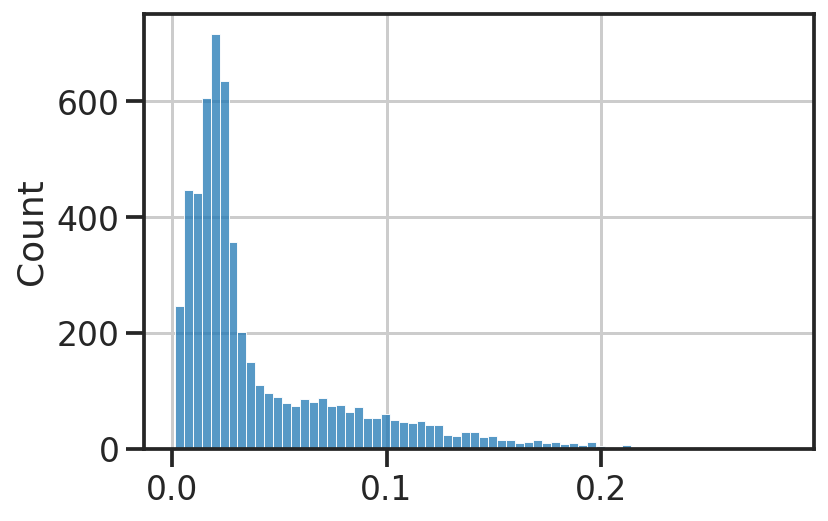

In [15]:
sns.histplot(df_m.std(axis=1))

(21, 12)


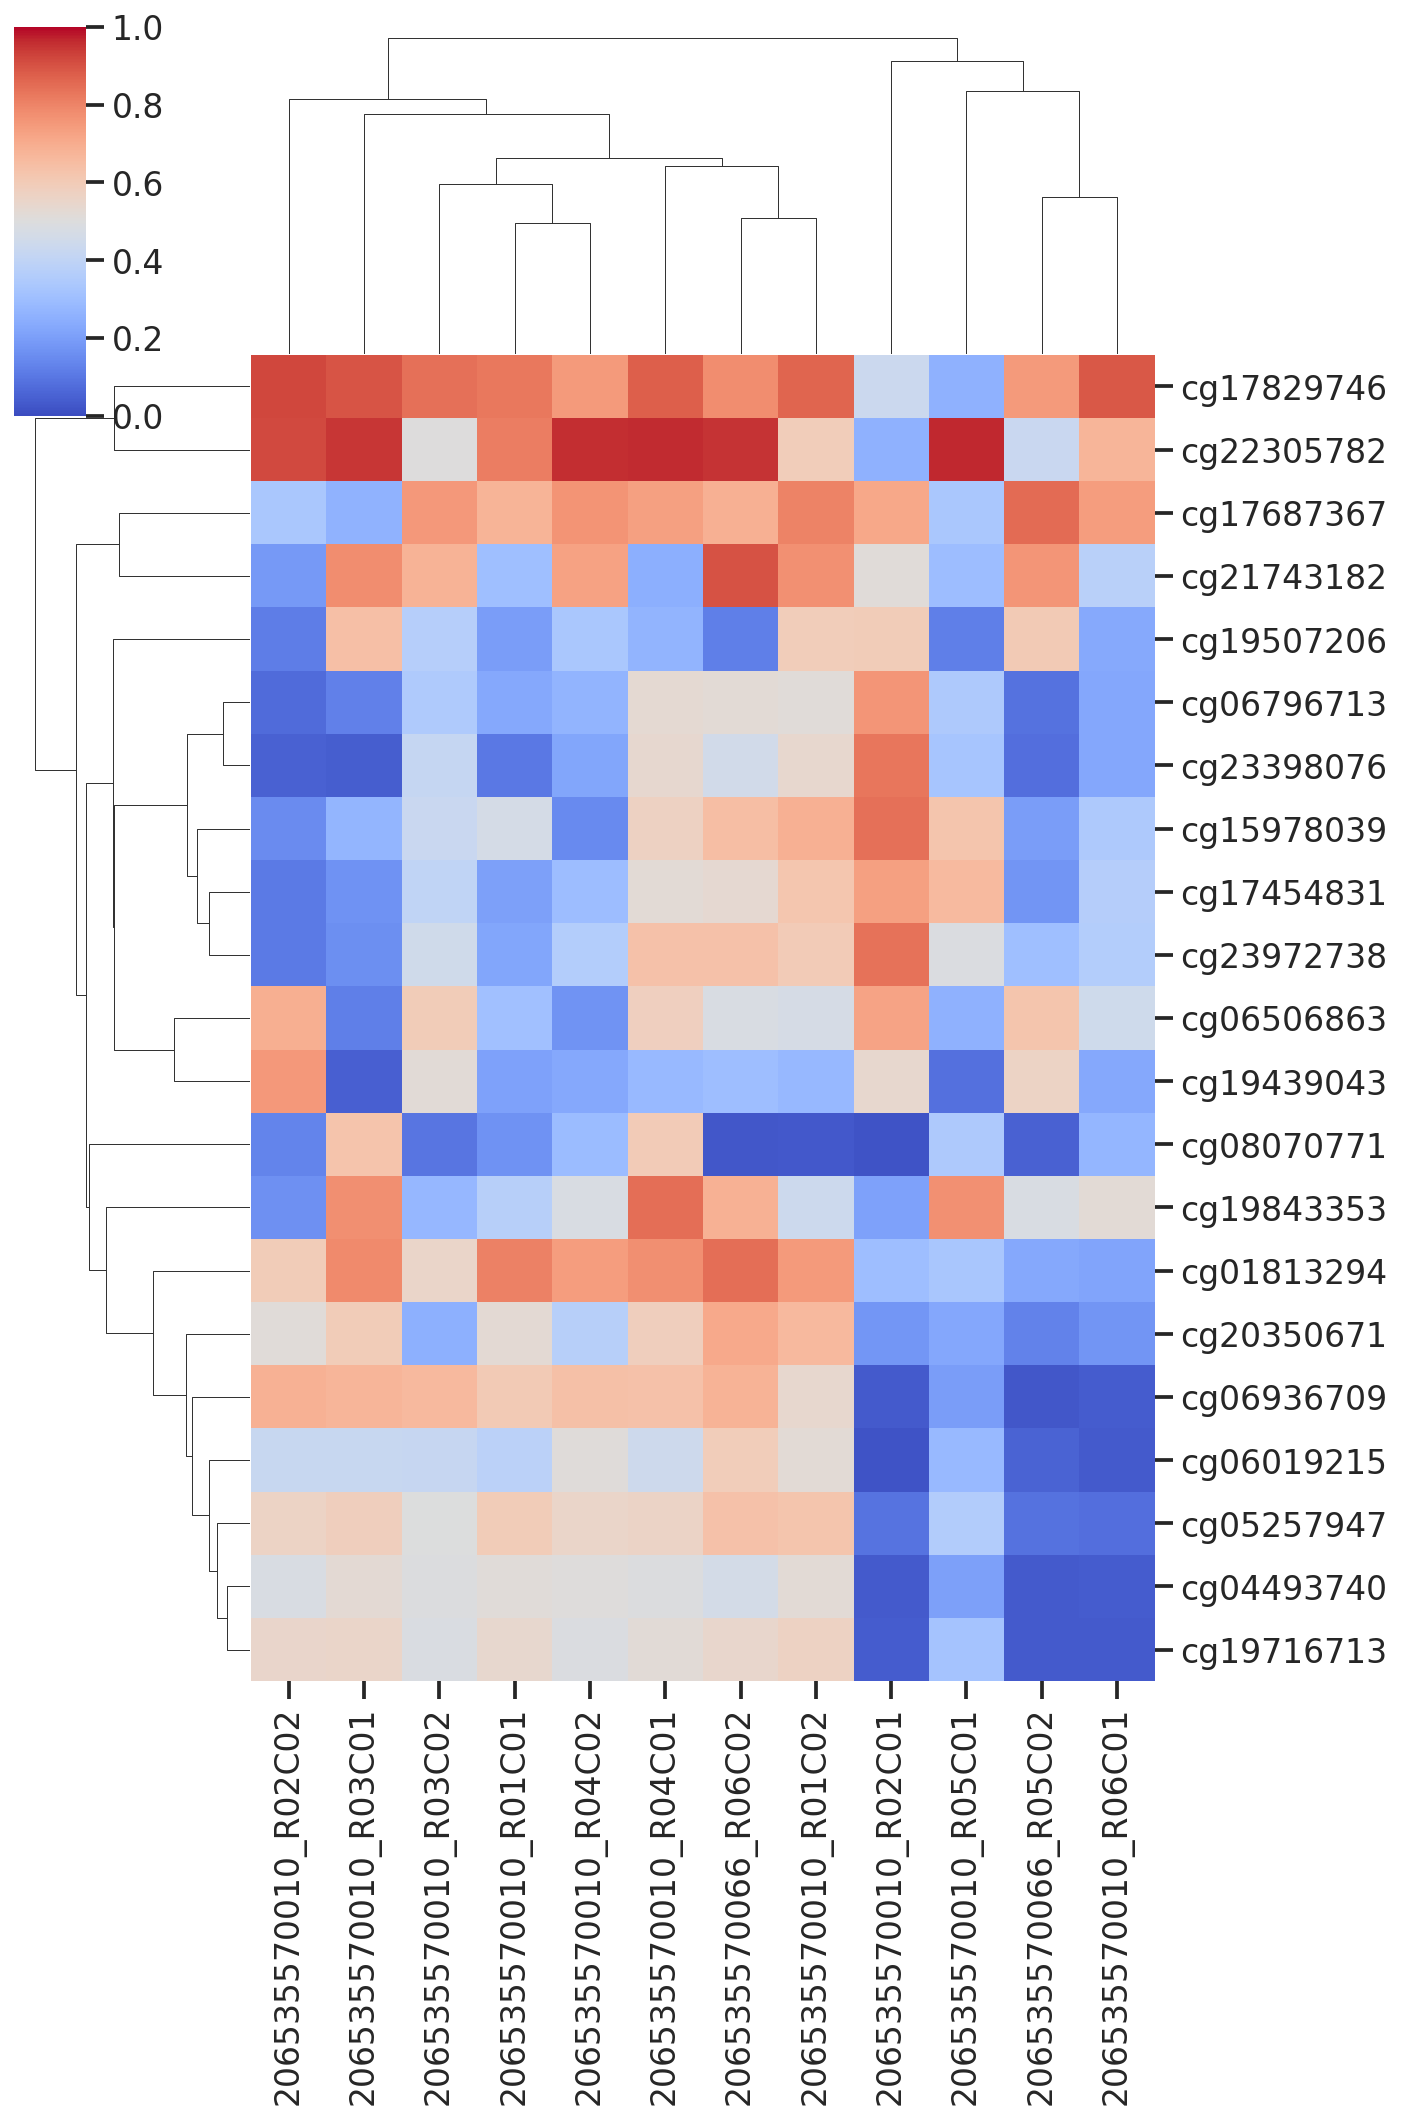

In [16]:
df_m_hv = df_m[df_m.std(axis=1)>0.2].copy()
print(df_m_hv.shape)
sns.clustermap(df_m_hv, cmap='coolwarm', figsize=(10,15), vmin=0, vmax=1)

In [17]:
adata_h = adata[cps]
adata_h

View of AnnData object with n_obs × n_vars = 5500 × 150
    var: 'Molecular Subgroup (Consensus)', 'Subgrouping based on 450K methylation data', 'Subrouping based on Affymetrix gene expression data', 'Subgrouping based on WGBS methylation data', 'Subgrouping based on H3K27Ac enhancer correlation', 'WGS cohort', 'RNASequencing cohort', 'WGBS cohort', 'H3K27Ac ChIP Sequencing cohort', 'BRD4 ChIP Sequencing cohort', 'OTX2 ChIP Sequencing cohort', 'MITF ChIP Sequencing cohort', 'Gender (F= FeMale, M=Male)', 'Age at diagnosis', 'Localization of primary tumor', 'Type of SMARCB1 mutation in MLPA/Sanger Sequencing ', 'Type of SMARCB1 mutation in MLPA/Sanger Sequencing', 'Previosuly published (PMID number)', 'gsm'

In [18]:
np.all(df_m.index.values == adata_h.obs.index.values)

True

In [30]:
df_h = pd.DataFrame(adata_h.X, index=adata_h.obs.index, columns=adata_h.var.index)[samp_order]
print(df_h.shape)
df_h = df_h[~np.any(np.isnan(df_h), axis=1)]
print(df_h.shape)

sites_std = df_h.std(axis=1, ddof=0)
th = 0.2
cond = sites_std > th

df_h_hv = df_h[cond]
df_m_hv = df_m.loc[df_h_hv.index]

sites_std_m = df_m_hv.std(axis=1, ddof=0)
th = 0.05
cond_m = sites_std_m > th
print(cond_m.sum())

df_h_hv = df_h_hv[cond_m]
df_m_hv = df_m_hv[cond_m]
print(df_h_hv.shape, df_m_hv.shape)

(5500, 150)
(5489, 150)
203
(203, 150) (203, 12)


In [31]:
import scipy.cluster.hierarchy as sch
rl_h = sch.linkage(df_h_hv.values, method='average')
rl_m = sch.linkage(df_m_hv.values, method='average')
cl_m = sch.linkage(df_m_hv.values.T, method='average')

rord_h = np.array(sch.dendrogram(rl_h, no_plot=True)['leaves'])
rord_m = np.array(sch.dendrogram(rl_m, no_plot=True)['leaves'])
cord_m = np.array(sch.dendrogram(cl_m, no_plot=True)['leaves'])

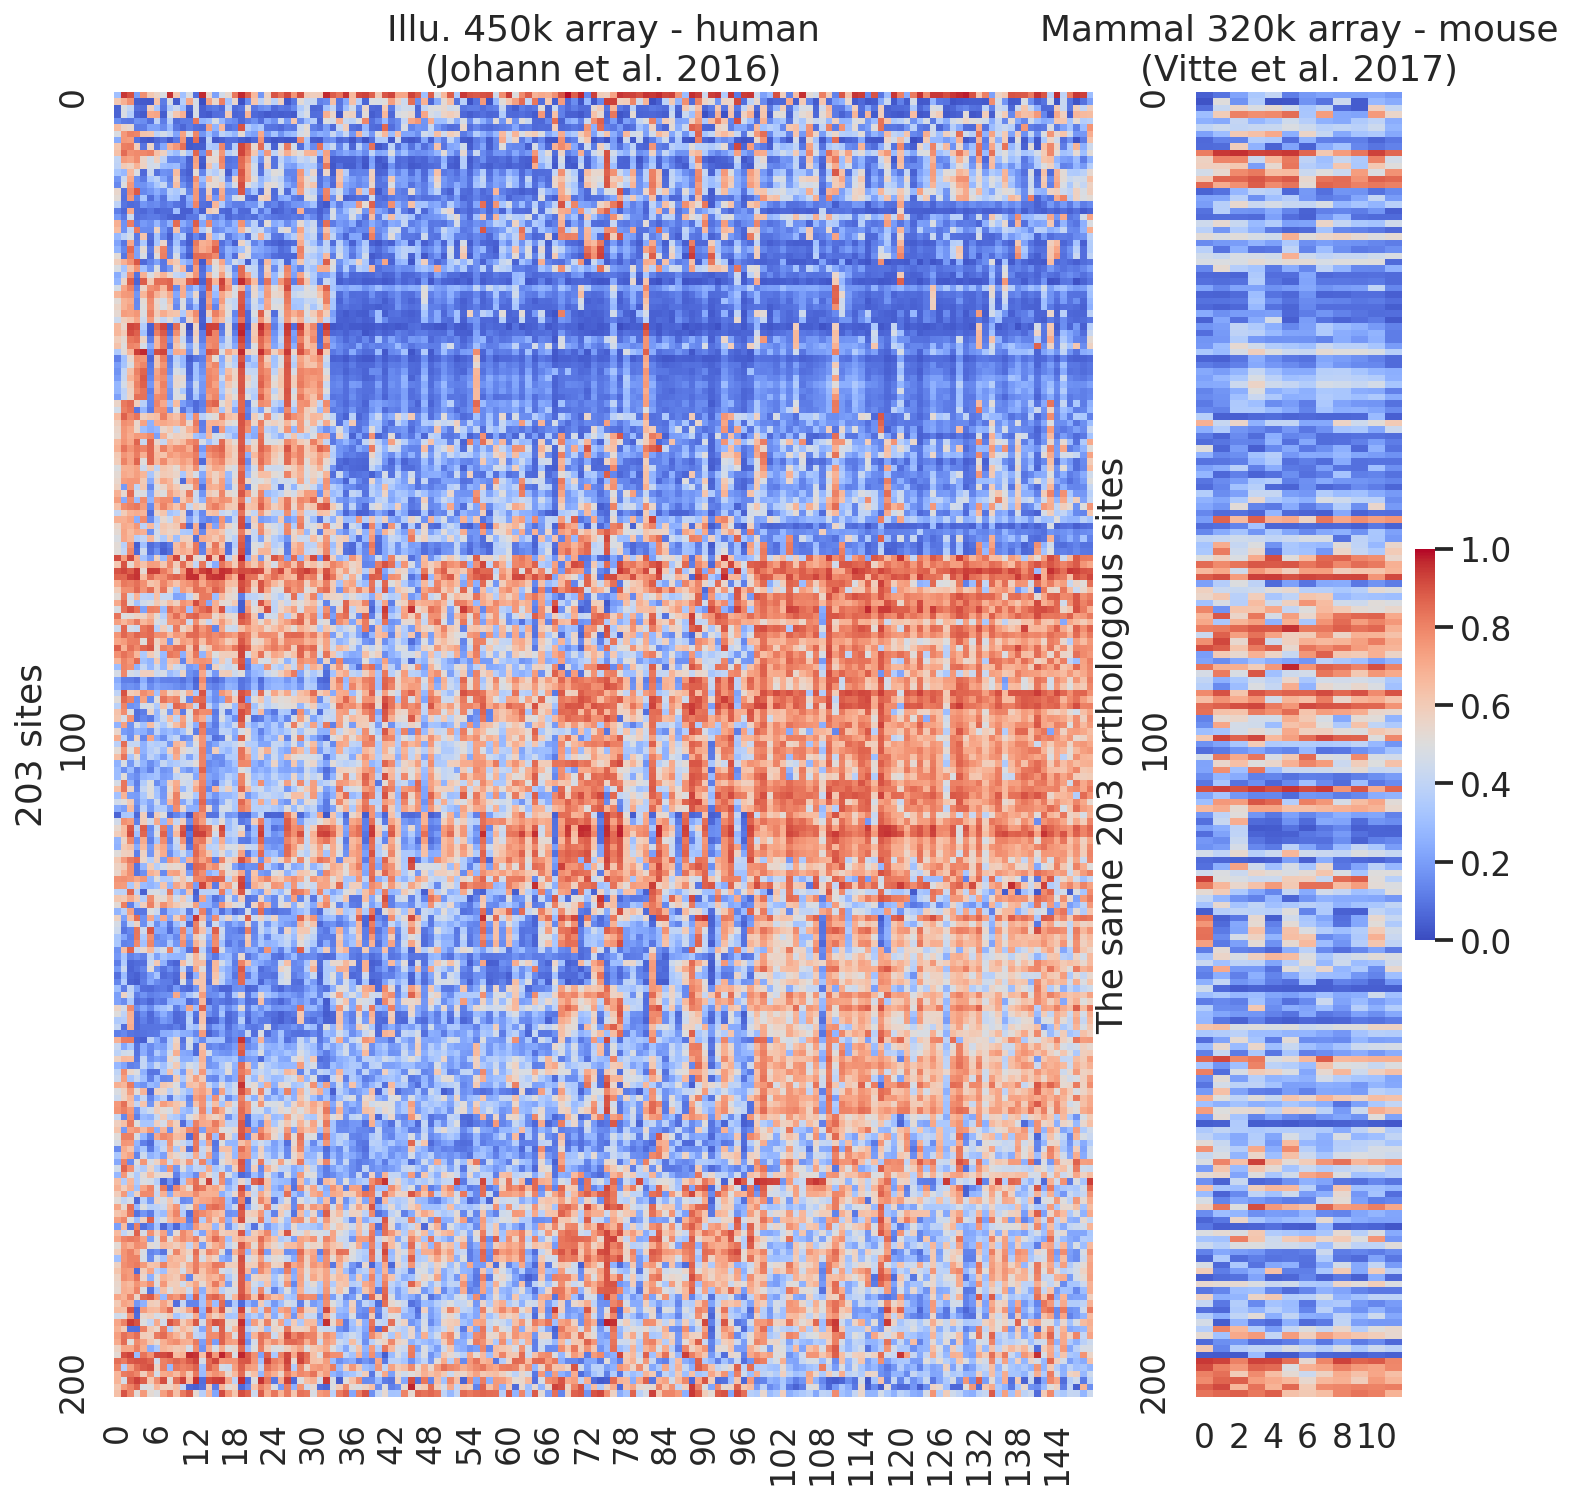

In [32]:
with sns.axes_style('white'):
    # fig, axs = plt.subplots(1,2,figsize=(2*6,1*12), sharey=False)
    fig = plt.figure(figsize=(2*6,1*12))
    mosaic = 'AAAB'
    ax_dict = fig.subplot_mosaic(mosaic)
    ax = ax_dict['A']
    # ax = axs[0]
    sns.heatmap(
        df_h_hv.values[rord_h], #[:,cord_h],
        yticklabels=100,
        cmap='coolwarm', 
        cbar_kws=dict(shrink=0.3),
        cbar=False,
        vmax=1, vmin=0, 
        ax=ax)
    ax.set_title('Illu. 450k array - human\n(Johann et al. 2016)')
    ax.set_ylabel(f'{len(rord_h)} sites')

    ax = ax_dict['B']
    # ax = axs[1]
    sns.heatmap(
        df_m_hv.values[rord_h][:,cord_m],
        yticklabels=100,
        cmap='coolwarm', 
        cbar_kws=dict(shrink=0.3),
        vmax=1, vmin=0, 
        ax=ax)
    ax.set_title('Mammal 320k array - mouse\n(Vitte et al. 2017)')
    ax.set_ylabel(f'The same {len(rord_h)} orthologous sites')
    fig.subplots_adjust(wspace=0.4)

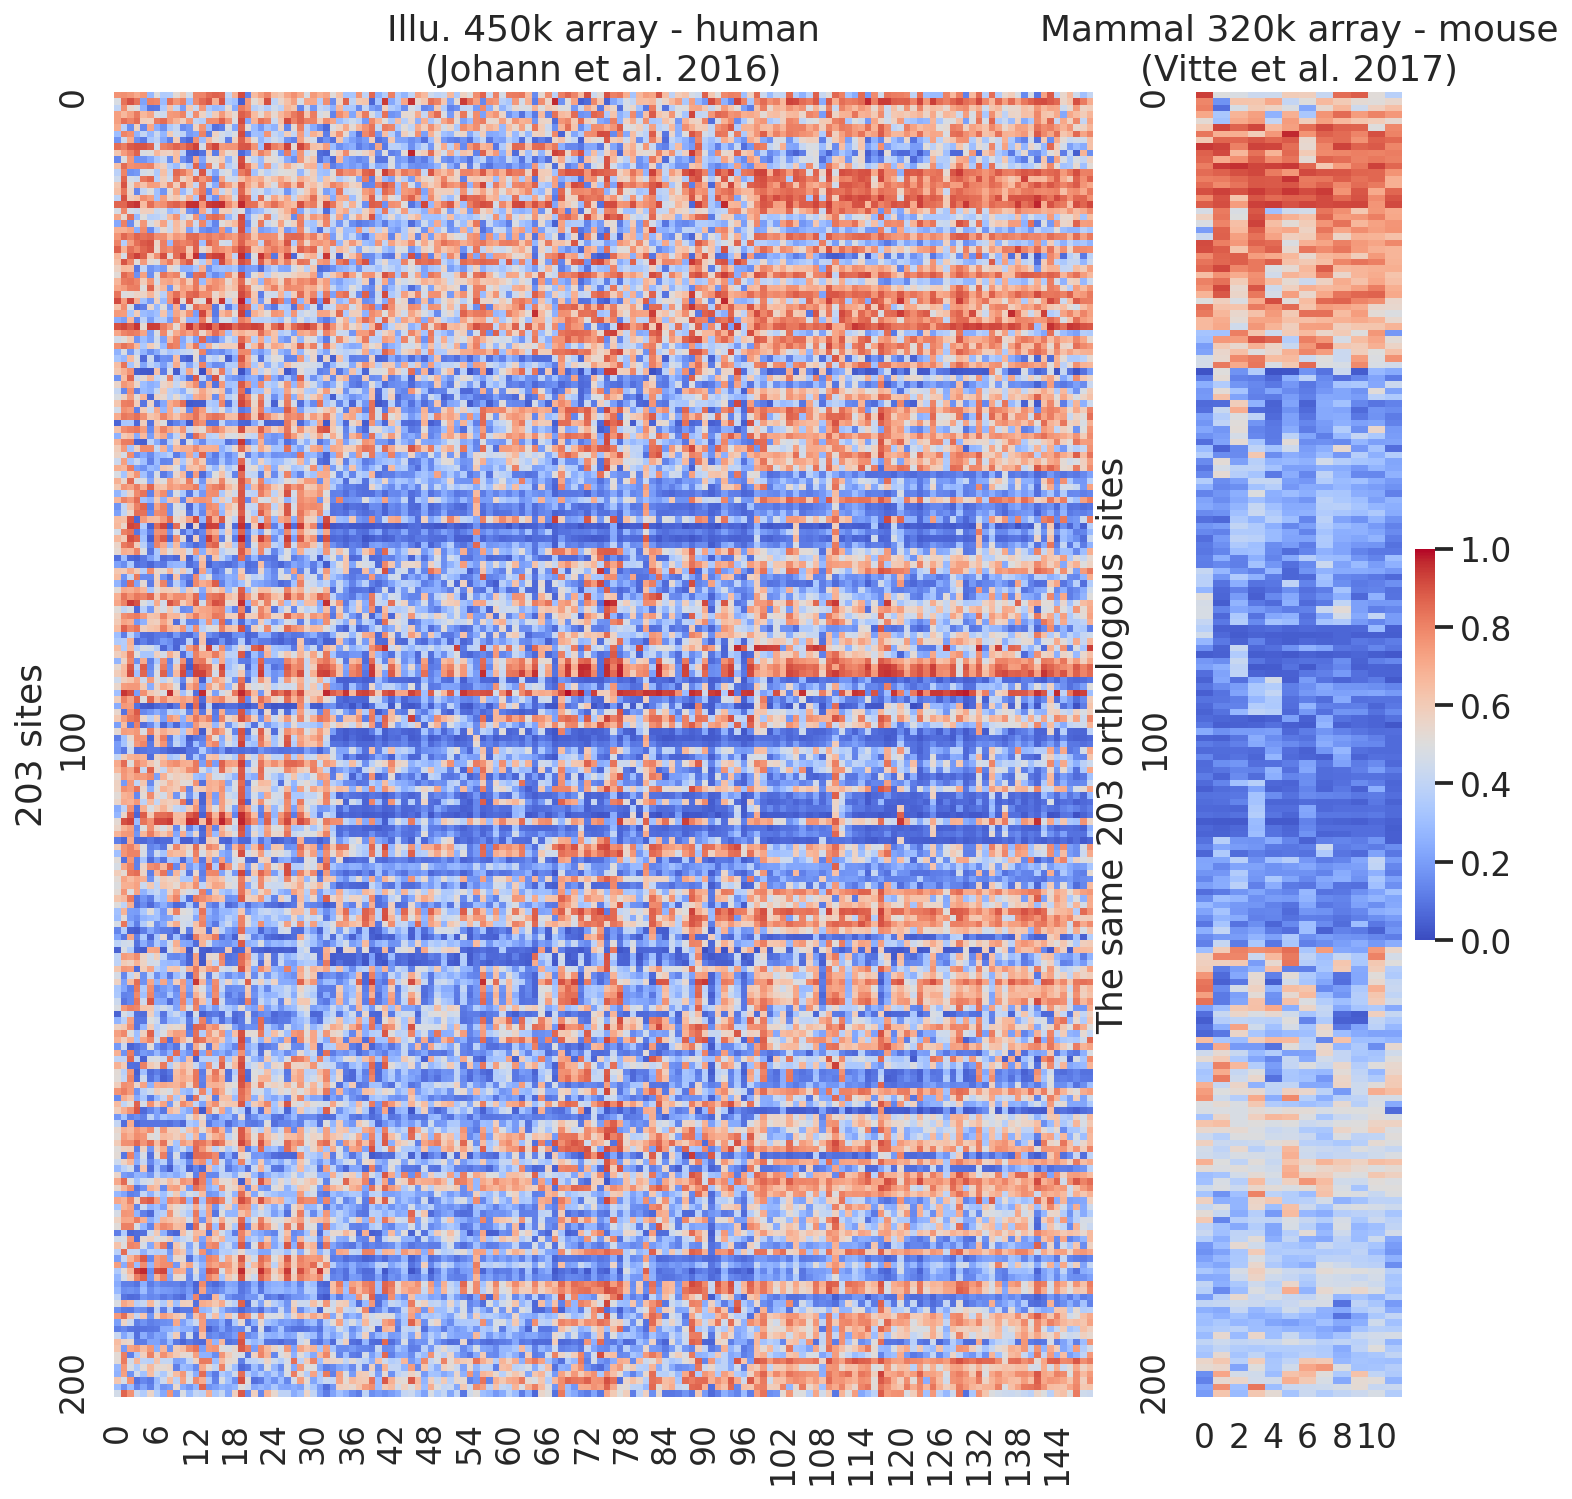

In [33]:
with sns.axes_style('white'):
    # fig, axs = plt.subplots(1,2,figsize=(2*6,1*12), sharey=False)
    fig = plt.figure(figsize=(2*6,1*12))
    mosaic = 'AAAB'
    ax_dict = fig.subplot_mosaic(mosaic)
    ax = ax_dict['A']
    # ax = axs[0]
    sns.heatmap(
        df_h_hv.values[rord_m], #[:,cord_h],
        yticklabels=100,
        cmap='coolwarm', 
        cbar_kws=dict(shrink=0.3),
        cbar=False,
        vmax=1, vmin=0, 
        ax=ax)
    ax.set_title('Illu. 450k array - human\n(Johann et al. 2016)')
    ax.set_ylabel(f'{len(rord_m)} sites')

    ax = ax_dict['B']
    # ax = axs[1]
    sns.heatmap(
        df_m_hv.values[rord_m][:,cord_m],
        yticklabels=100,
        cmap='coolwarm', 
        cbar_kws=dict(shrink=0.3),
        vmax=1, vmin=0, 
        ax=ax)
    ax.set_title('Mammal 320k array - mouse\n(Vitte et al. 2017)')
    ax.set_ylabel(f'The same {len(rord_h)} orthologous sites')
    fig.subplots_adjust(wspace=0.4)

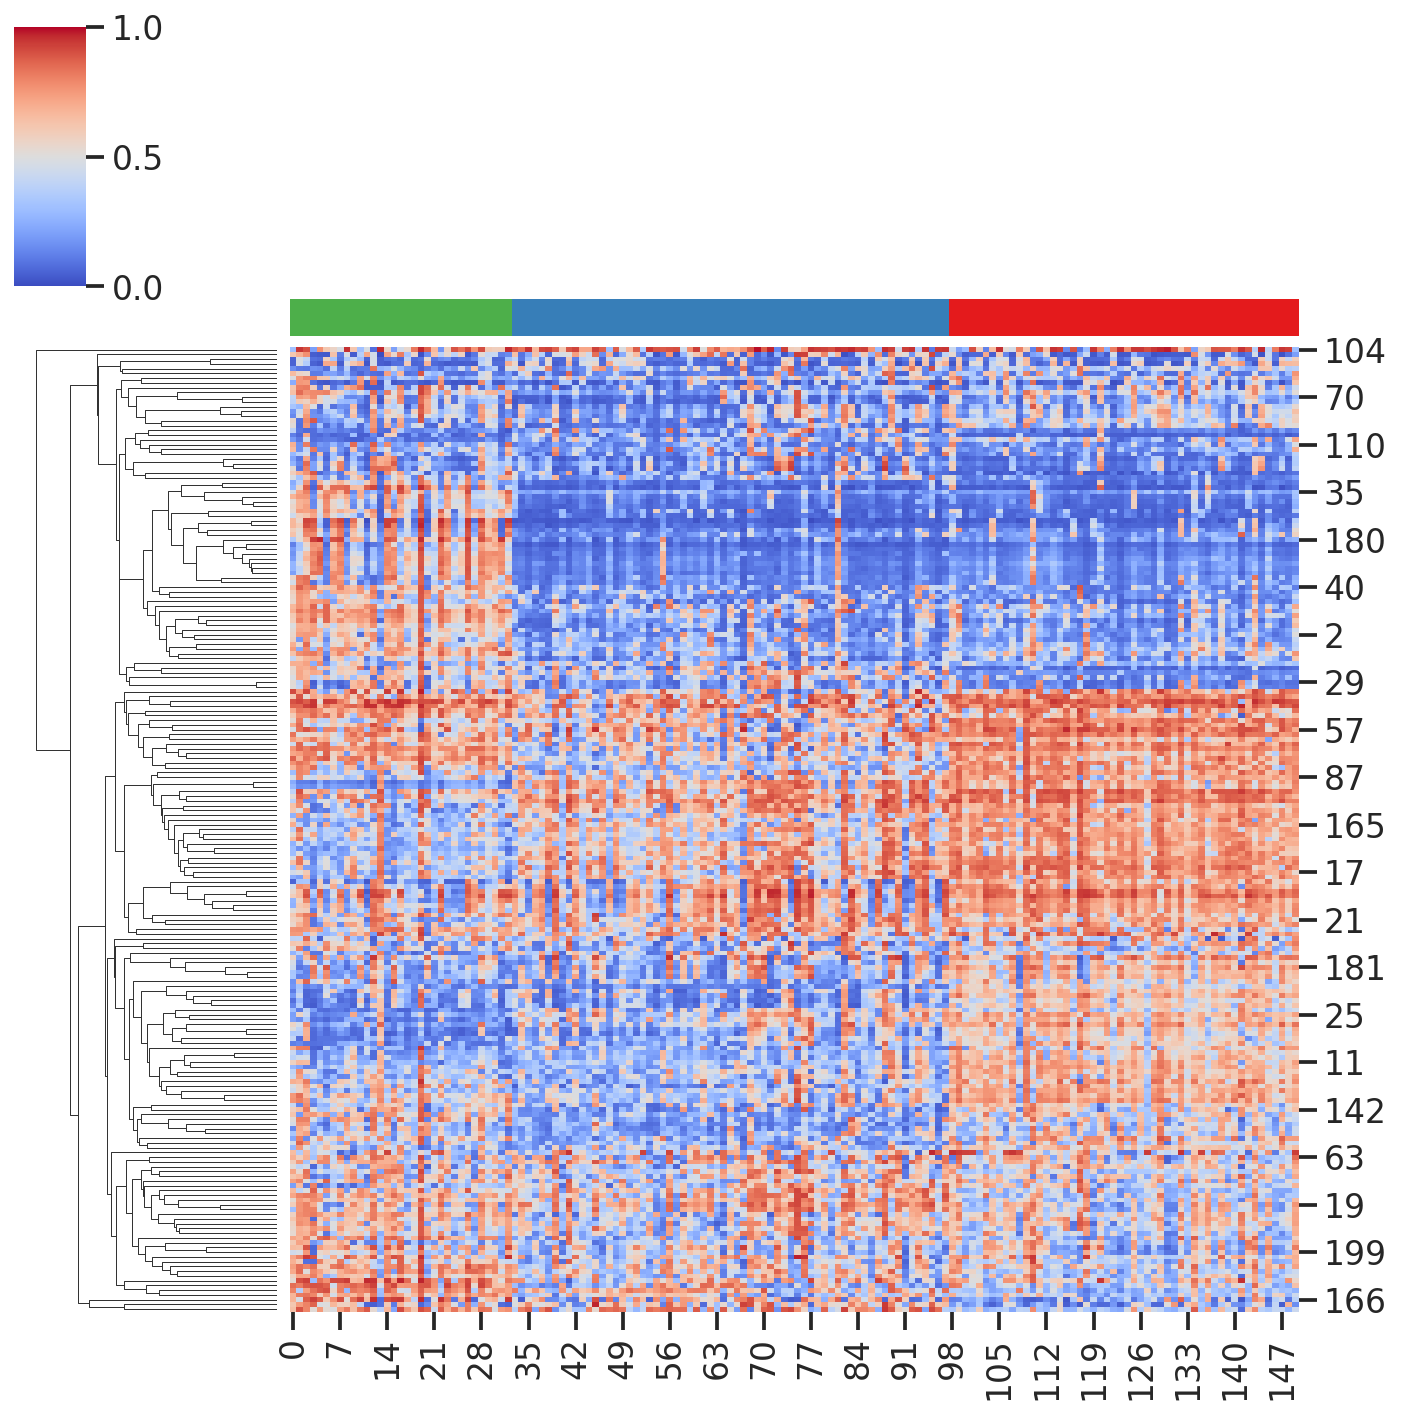

In [34]:
sns.clustermap(df_h_hv.values, 
               row_linkage=rl_h, 
               col_cluster=False,
               # col_linkage=cl_h, 
               # col_colors=pd.Series(clsts).map(palette).values,
               col_colors=pd.Series(clsts_order).map(palette).values,
               cmap='coolwarm', 
               vmax=1, vmin=0,
              )

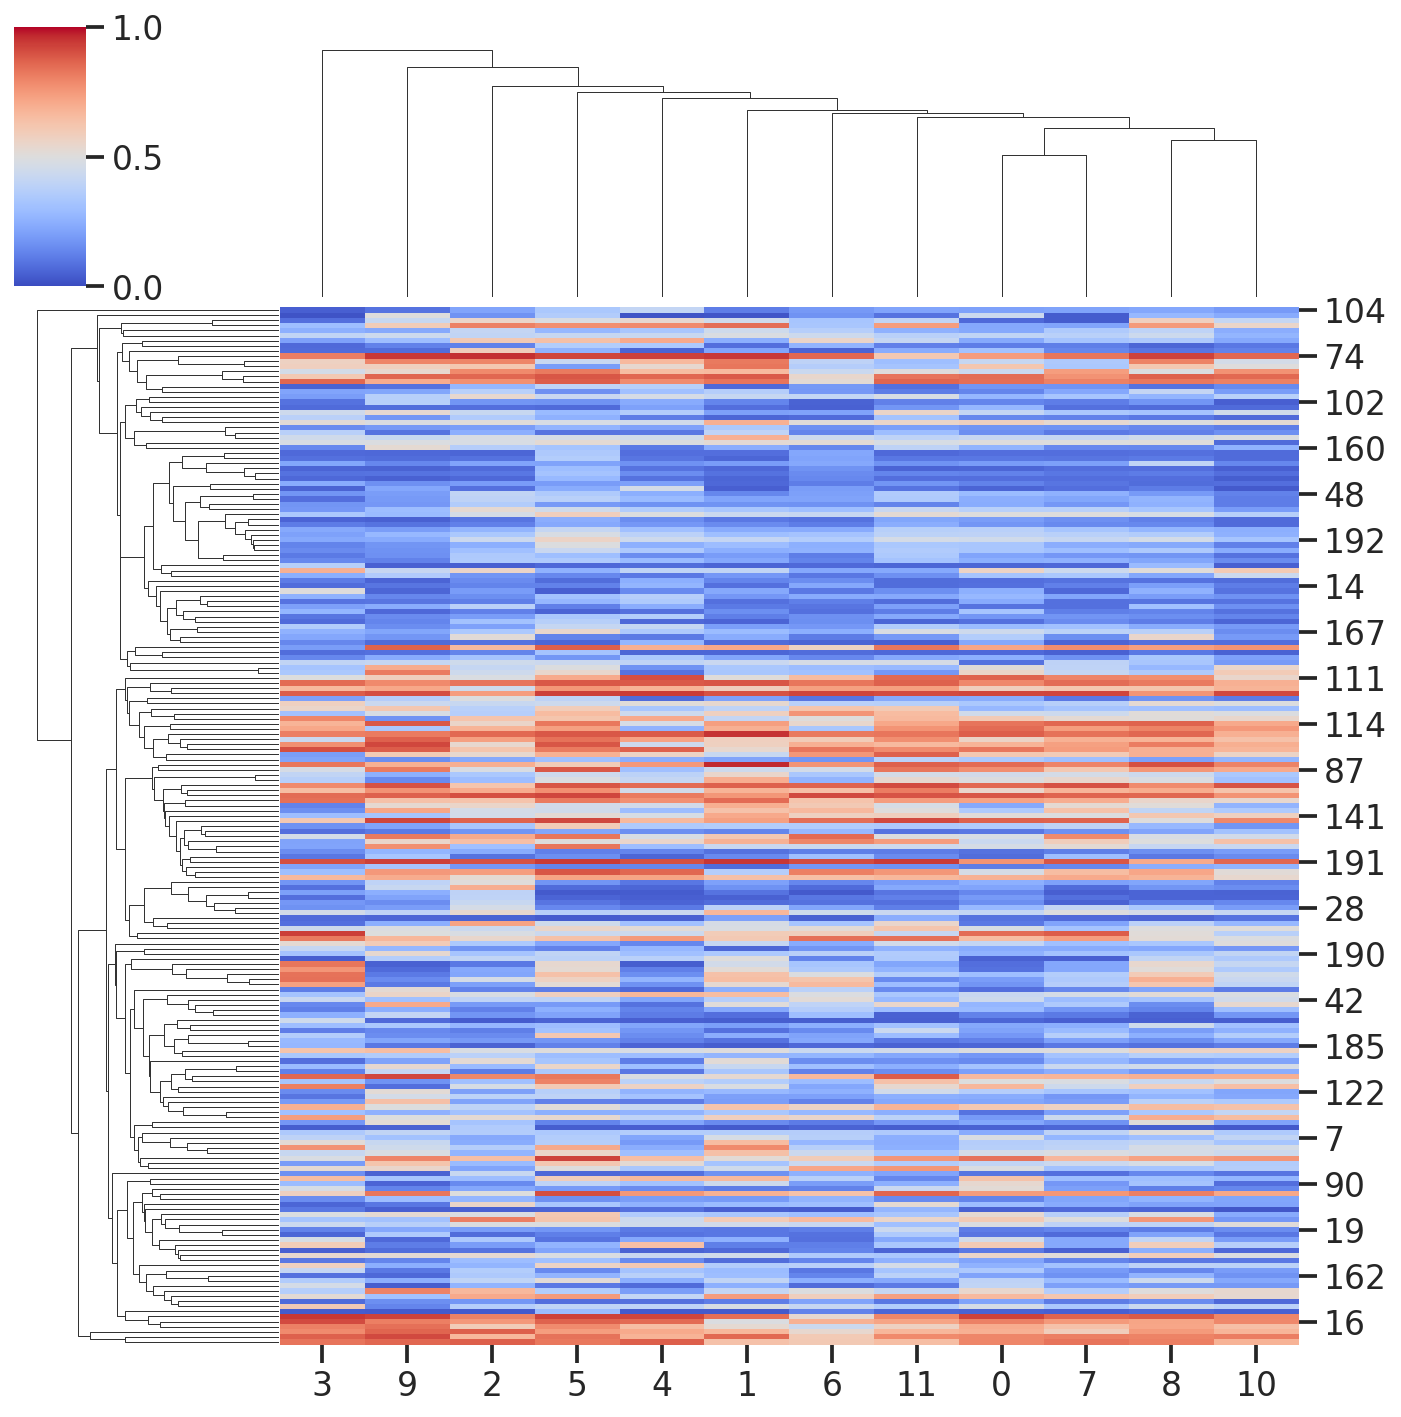

In [35]:
sns.clustermap(df_m_hv.values, 
               row_linkage=rl_h, 
               # col_colors=pd.Series(clsts).map(palette).values,
               cmap='coolwarm', 
               vmax=1, vmin=0,
              )

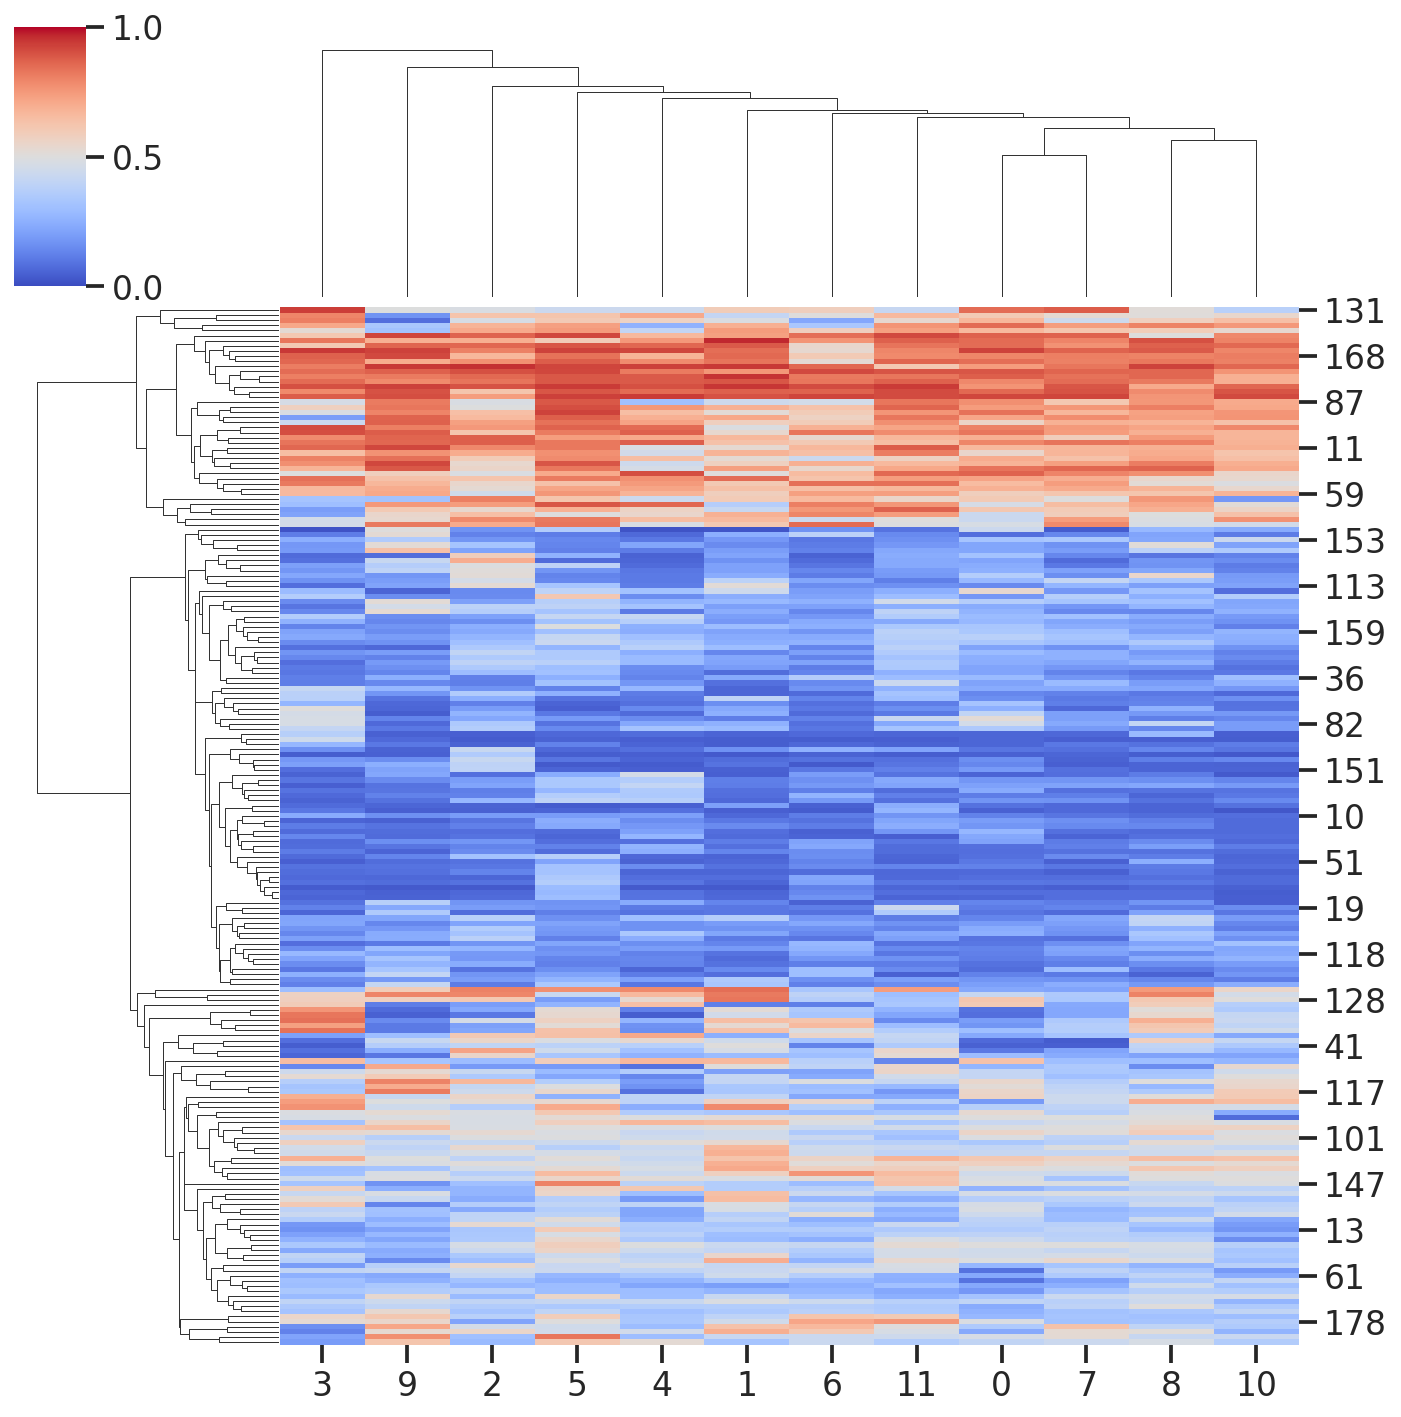

In [36]:
sns.clustermap(df_m_hv.values, 
               # row_linkage=rl_h, 
               # col_colors=pd.Series(clsts).map(palette).values,
               cmap='coolwarm', 
               vmax=1, vmin=0,
              )